# MTH3302 : Méthodes probabilistes et statistiques pour l'I.A.

Jonathan Jalbert<br/>
Professeur agrégé au Département de mathématiques et de génie industriel<br/>
Polytechnique Montréal<br/>


## TD8 : Modèles bayésiens pour la loi normale

Dans ce TD, nous implémenterons l'échantillonnage de Gibbs permettant d'otenir un échantillon aléatoire à partir de la forme fonctionnelle d'une loi de probabilité multidimensionnelle. Nous effectuerons également la sélection de modèle bayésienne de modèle statistique. La lecture du chapitre 6 des notes de cours vous sera très utile.

Nous reprenons les observations de l'expérience de Michelson-Morley prises par Illingworth en 1927.

In [56]:
# Chargement des librairies nécessaires
using CSV, DataFrames, Gadfly, Statistics, Distributions

# Chargement des données
data = CSV.read("illingworth1927.csv", DataFrame)

df = filter(row -> (row.Time == "5 a.m.") & (row.Direction =="N"), data )
y = df[:,:FringeDispl]

ȳ = mean(y)
s = std(y)
n = length(y);


f₁(σ²::Real) = Normal(ȳ,sqrt(σ²/n))
f₂(μ::Real) = InverseGamma(n/2,sum((y.-μ).^2))

m = 1000
μ = zeros(m)
σ² = zeros(m)
μ[1] = 0
σ²[1] = 0
for t=2:m 
    μ[t] = rand(f₁(σ²[t-1]))
    σ²[t] =rand(f₂(μ[t-1]))
end 
p₁ = plot(x=1:m,y=μ , Geom.line)
p₂ = plot(x=1:m,y=σ² , Geom.line)
deleteat!(μ,(1:100))
deleteat!(σ²,(1:100))

s² = (1/(n-1))*sum((y.-ȳ).^2)
unvariant_distribution =LocationScale(ȳ,sqrt(s²/n),TDist(n-1))

set_default_plot_size(15cm,10cm);
d₃ = plot(layer(x = μ, Geom.histogram(density=true)),
layer(
    x=1:length(μ),
    y = pdf.(unvariant_distribution,1:length(μ)),
    Geom.line),Coord.cartesian(ymin=0, ymax=0.05))

# part 2
y = data[:,:FringeDispl]

ȳ = mean(y)
s = std(y)
n = length(y)

k₁ = 2
m₁ = Normal(0,3/2)

vraisemblance_modele_1 = loglikelihood(m₁,y)
bic₁ = vraisemblance_modele_1 - (k₁/2)*log(n)

σ²_hat = (1/n)*sum(y.^2)

k₂ = 2
m₂ = Normal(0,sqrt(σ²_hat))
vraisemblance_modele_2 = loglikelihood(m₂,y)
bic₂ = vraisemblance_modele_2 - (k₁/2)*log(n)



Le modele 2 est meilleur que le modele 1


In [2]:
# Chargement des librairies nécessaires
using CSV, DataFrames, Gadfly, Statistics, Distributions

## Exercice 1 : Expérience de Michelson-Morley (avec variance inconnue)

On a que

$$ Y_i \sim \mathcal{N} \left( \mu, \sigma^2 \right) ; $$

avec la variance inconnue. On utilise la loi *a priori* impropre suivante pour les paramètres $\mu$ et $\sigma^2$ :

$$f_{(\mu,\sigma^2)}(\mu,\sigma^2) \propto \frac{1}{\sigma^2} \mbox{ pour }\sigma^2 >0. $$

Nous utiliserons l'échantillonnage de Gibbs pour obtenir un échantillon de la loi *a posteriori*.

In [3]:
# Chargement des données
data = CSV.read("illingworth1927.csv", DataFrame)

df = filter(row -> (row.Time == "5 a.m.") & (row.Direction =="N"), data )
y = df[:,:FringeDispl]

ȳ = mean(y)
s = std(y)
n = length(y);


### (a) Écrivez la loi conditionnelle complète de $\mu$.

On veut une fonction qui retourne la loi conditionnelle complète de μ pour une valeur de σ² donnée. La fonction doit retourner un objet de type *Distribution*. 

In [4]:
f₁(σ²::Real) = Normal(ȳ,σ²/n)

f₁ (generic function with 1 method)

### (b) Écrivez la loi conditionnelle complète de $\sigma^2$.

On veut une fonction qui retourne la loi conditionnelle complète de σ² pour une valeur de μ donnée. La fonction doit retourner un objet de type *Distribution*. 

In [5]:
f₂(μ::Real) = InverseGamma(n/2,sum((y.-μ).^2))

f₂ (generic function with 1 method)

### (c) Générez un échantillon aléatoire de la loi *a posteriori*.

À l'aide des lois conditionnelles complètes, faites 1000 itérations de l'échantillonnage de Gibbs pour générer un échantillon de la loi *a posteriori*. Vous pouvez initialiser μ et σ² à des valeurs quelconques. 

In [22]:
m = 1000
μ = zeros(m)
σ² = zeros(m)
μ[1] = 0
σ²[1] = 0
for t=2:m 
    μ[t] = rand(f₁(σ²[t-1]))
    σ²[t] =rand(f₂(μ[t-1]))
end 

### (d) Tracez la chaîne obtenue pour $\mu$.

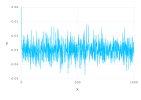

In [23]:
plot(x=1:m,y=μ , Geom.line)

### (e) Tracez la chaîne obtenue pour $\sigma^2$.

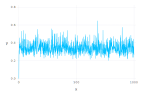

In [24]:
plot(x=1:m,y=σ² , Geom.line)

### (f) Rejetez les itérations de la phase de chauffe

In [9]:
deleteat!(μ,(1:100))
deleteat!(σ²,(1:100))

900-element Vector{Float64}:
  0.2019316537201119
  1.2345427609191182
  1.4246854231629318
  0.6181330323134904
  0.5737879152589686
  0.296349912666908
  0.48229621746596424
  0.4467626511845881
  0.9769737725118229
  0.4335768038082328
  ⋮
 Inf
  0.38800424293968533
 Inf
  0.2913051766630736
 Inf
  0.25664379922566527
 Inf
  0.9010896900471356
 Inf

### (f) Calculez la loi *a posteriori* marginale de μ

Cette loi est donnée dans l'exemple 2 des notes de cours. Calculez ses paramètres et construisez l'objet de type *UnivariateDistribution* en utiisant la fonction `LocationScale()`.

In [10]:
s² = (1/(n-1))*sum((y.-ȳ).^2)
unvariant_distribution =LocationScale(ȳ,sqrt(s²/n),TDist(n-1))

### (g) Vérifiez que la chaine générée pour μ correspond à la loi marginale

Pour vérifier que votre chaîne μ générée correspond à la loi *a posteriori* marginale de μ, comparez la densité de la loi que vous avez obtenue à la question précédente à l'histogramme de la chaine des μ. Vous pouvez même superposer la densité à l'histogramme sur le même graphique en utilisant la fonction `layer()` de Gadfly et l'option `density=true` de la géométrie `Geom.histrogram()`.

## Exercice 2 : Détermination de la variance de l'erreur du montage d'Illingworth

On sait aujourd'hui que le vrai déplacement des franges d'interférence est égal à 0, peu importe les conditions d'observation. On peut alors supposer le modèle suivant pour estimer la variance de l'erreur expérimentale du montage

$$ Y_i \sim \mathcal{N} \left( 0, \sigma^2 \right) ; $$

pour les 64 observations effectuées.

Nous allons d'abord vérifier si Illingworth a bien estimé l'erreur de son montage en comparant les modèles satistiques suivants :

$$ \mathcal{M}_1 : Y_i \sim \mathcal{N} \left( 0, (3/2)^2 \right) , $$
$$ \mathcal{M}_2 : Y_i \sim \mathcal{N} \left( 0, \sigma^2 \right) ; $$

le modèle $\mathcal{M}_1$ correspond à l'hypothèse d'Illingworth et le modèle $\mathcal{M}_2$ suppose une variance d'erreur différente. Si le modèle $\mathcal{M}_2$ est plus vraisemblable, alors nous estimerons la variance expérimentale du montage.

In [12]:
y = data[:,:FringeDispl]

ȳ = mean(y)
s = std(y)
n = length(y)

64

### (a) Calculez la log vraisemblance du modèle $\mathcal{M}_1$

In [13]:
vraisemblance_modele_1

### (b) Calculez le bic du modèle $\mathcal{M}_1$

In [15]:
bic₁

### (c) Calculez l'estimation du maximum de la vraisemblance de σ²

Vous devez calculez à main la formule de l'estimateur en dérivant la vraisemblance puis calculez l'estimation avec les données.

L'estimateur du maximum de la vraisemblance est

$$ \hat\sigma^2 = \frac{1}{n} \sum_{i=1}^n y_i^2. $$

In [16]:
σ²_hat

### (d) Calculez la log-vraisemblance du modèle $\mathcal{M}_2$ évaluée à σ̂²

In [17]:
vraisemblance_modele_2

### (e) Calculez le BIC du modèle $\mathcal{M}_2$

In [19]:
bic₂

### (f) Quel est le meilleur modèle ?

Selon les BIC calculés, quel est le meilleur modèle ?

In [20]:
if(bic₂ > bic₁)
    println("Le modele 2 est meilleur que le modele 1")
else
    println("Le modele 1 est meilleur que le modele 2")
end

### (g) Estimez l'écart-type expériemental σ du montage d'Illingworth